In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=12,7

### Making the DataFrame

In [ ]:
df=pd.DataFrame(columns='SongID Spectral_Centroid Zero_Cross Spectral_Rolloff MFCC Chroma'.split())
gen='classical rock'.split()
directory='C:/Users/vybha/Desktop/My stuff/Analytics club/Music/'
for g in gen:
    for filename in os.listdir(os.path.join(directory,f'{g}/')):
        song=f'{directory}/{g}/{filename}'
        s,sr=librosa.load(song)
        spec_c=np.mean(librosa.feature.spectral_centroid(s,sr=sr))
        zero_c=np.mean(librosa.feature.zero_crossing_rate(s))
        spec_roll=np.mean(librosa.feature.spectral_rolloff(s,sr=sr))
        mfcc=np.mean(librosa.feature.mfcc(s,sr=sr))
        chroma=np.mean(librosa.feature.chroma_stft(s,sr=sr))
        df1=pd.DataFrame([[filename,spec_c,zero_c,spec_roll,mfcc,chroma]],columns='SongID Spectral_Centroid Zero_Cross Spectral_Rolloff MFCC Chroma'.split())
        df=df.append(df1)
        df=df.reset_index(drop=True)

In [ ]:
df['Song_Type']='Classical'

In [ ]:
df['Song_Type'][100:]='Rock'

In [ ]:
df.iloc[98:101]

,SongID,Spectral_Centroid,Zero_Cross,Spectral_Rolloff,MFCC,Chroma,Song_Type
98,classical.00098.au,1952.495511,0.123423,3779.826564,-7.809977,0.289919,Classical
99,classical.00099.au,1525.123851,0.080685,3325.680818,-7.733024,0.333908,Classical
100,rock.00000.au,1996.327664,0.090220,4227.935352,-0.271872,0.387577,Rock


In [ ]:
df.to_csv('Music.csv',index=False)

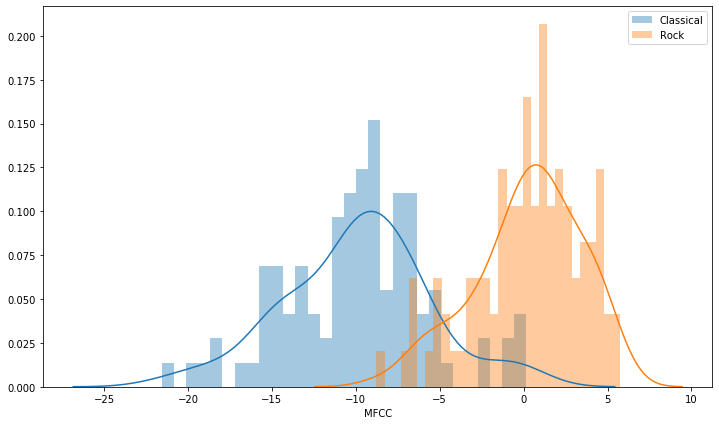

In [ ]:
ax=sns.distplot(df[df['Song_Type']=='Classical']['MFCC'],bins=30,label='Classical')
sns.distplot(df[df['Song_Type']=='Rock']['MFCC'],bins=30,ax=ax,label='Rock')
ax.legend()

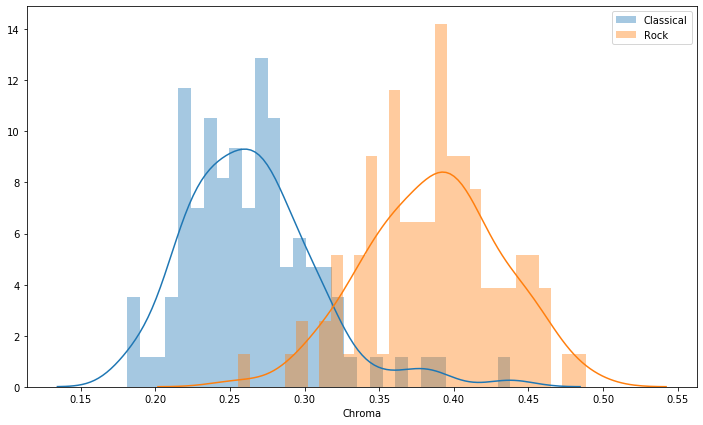

In [ ]:
ax=sns.distplot(df[df['Song_Type']=='Classical']['Chroma'],bins=30,label='Classical')
sns.distplot(df[df['Song_Type']=='Rock']['Chroma'],bins=30,ax=ax,label='Rock')
ax.legend()

In [ ]:
import xgboost as xgb

### Making the train and test values

In [ ]:
train1=df[:80]
train2=df[100:180]
test1=df[80:100]
test2=df[180:200]

In [ ]:
test2.shape

(20, 7)

In [ ]:
train=train1.append(train2,ignore_index=True)
test=test1.append(test2,ignore_index=True)

In [ ]:
train.shape

(160, 7)

In [ ]:
test.shape

(40, 7)

### Shuffling the data

In [ ]:
train=train.sample(frac=1).reset_index(drop=True)

In [ ]:
train.head()

,SongID,Spectral_Centroid,Zero_Cross,Spectral_Rolloff,MFCC,Chroma,Song_Type
0,classical.00019.au,1185.210139,0.057629,2290.771428,-13.505075,0.283993,Classical
1,classical.00047.au,1173.883591,0.066340,2082.725380,-16.369090,0.258511,Classical
2,classical.00023.au,983.724642,0.044217,1852.729787,-9.477051,0.267224,Classical
3,classical.00071.au,1397.437273,0.075863,2616.034375,-7.620702,0.208080,Classical
4,classical.00005.au,1431.055193,0.075210,2835.996128,-6.696702,0.268530,Classical


### Model 1:XGB
#### I am using xgboost to do the predictions as usually gradient boosted trees give the best results

In [ ]:
model=xgb.XGBClassifier(max_depth=5,learning_rate=0.05,verbosity=2)
model.fit(train.drop(['SongID','Song_Type'],axis=1),train['Song_Type'])

[19:25:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:25:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:25:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:25:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:25:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:25:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:25:50]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2)

In [ ]:
preds=model.predict(test.drop(['SongID','Song_Type'],axis=1))

In [ ]:
preds

array(['Classical', 'Classical', 'Classical', 'Classical', 'Classical',
       'Classical', 'Classical', 'Classical', 'Classical', 'Classical',
       'Classical', 'Classical', 'Classical', 'Classical', 'Classical',
       'Classical', 'Classical', 'Classical', 'Classical', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Classical', 'Rock'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print(classification_report(test['Song_Type'],preds))

precision    recall  f1-score   support

   Classical       0.95      0.95      0.95        20
        Rock       0.95      0.95      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [ ]:
print(confusion_matrix(test['Song_Type'],preds))

[[19  1]
 [ 1 19]]


In [ ]:
print(accuracy_score(test['Song_Type'],preds))

0.95


#### We have an accuarcy of 95 which is good. Since we have an even dataset, accuracy is a good metric

#### I could have done a gridsearch to find the best parameters for the model which may have increased the accuracy a bit

Text(87.0, 0.5, 'Actual')

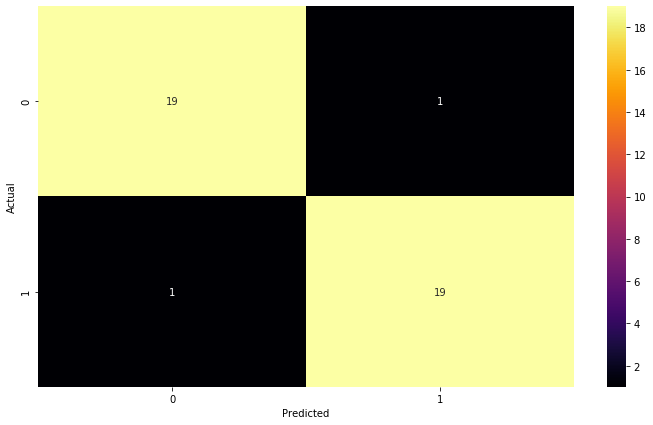

In [ ]:
sns.heatmap(confusion_matrix(test['Song_Type'],preds),cmap='inferno',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### We can see that  19 rock songs were labelled correctly.Similarly, 19 classical songs were predicted as correctly

### LGBM model

In [ ]:
import lightgbm as lgb

In [ ]:
model=lgb.LGBMClassifier(num_leaves=64,learning_rate=0.05,max_depth=5)
model.fit(train.drop(['SongID','Song_Type'],axis=1),train['Song_Type'])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=64, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
preds1=model.predict(test.drop(['SongID','Song_Type'],axis=1))

In [ ]:
print(classification_report(test['Song_Type'],preds1))

precision    recall  f1-score   support

   Classical       0.95      1.00      0.98        20
        Rock       1.00      0.95      0.97        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [ ]:
print(accuracy_score(test['Song_Type'],preds1))

0.975


Text(87.0, 0.5, 'Actual')

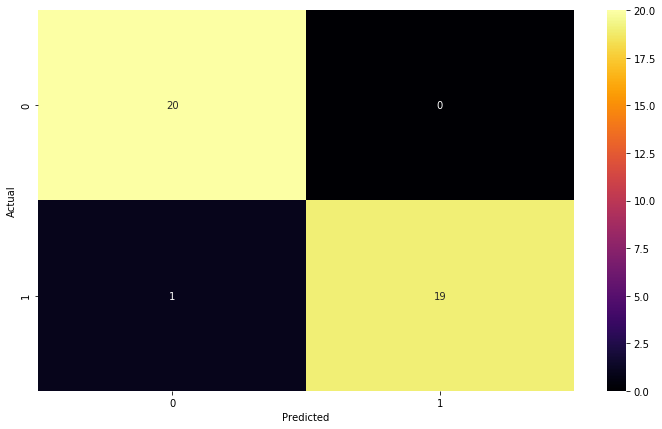

In [ ]:
sns.heatmap(confusion_matrix(test['Song_Type'],preds1),cmap='inferno',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### we get better results with this

### Implementation 3: An ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler,LabelBinarizer

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(train.drop(['SongID','Song_Type'],axis=1))
X_test=scaler.transform(test.drop(['SongID','Song_Type'],axis=1))

In [ ]:
bina=LabelBinarizer()
y_train=bina.fit_transform(train['Song_Type']).ravel()
y_test=bina.transform(test['Song_Type']).ravel()

In [ ]:
X_train.shape

(160, 5)

In [ ]:
model=Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
earlystop=EarlyStopping(patience=3,monitor='val_loss',verbose=1,mode='min')
epochs=100
model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),callbacks=[earlystop])

Train on 160 samples, validate on 40 samples
Epoch 1/100
160/160 [==============================] - 1s 4ms/sample - loss: 0.6419 - accuracy: 0.5250 - val_loss: 0.6300 - val_accuracy: 0.6750
Epoch 2/100
160/160 [==============================] - 0s 249us/sample - loss: 0.6013 - accuracy: 0.8125 - val_loss: 0.6055 - val_accuracy: 0.9000
Epoch 3/100
160/160 [==============================] - 0s 118us/sample - loss: 0.5692 - accuracy: 0.9187 - val_loss: 0.5788 - val_accuracy: 0.8750
Epoch 4/100
160/160 [==============================] - 0s 106us/sample - loss: 0.5329 - accuracy: 0.9375 - val_loss: 0.5471 - val_accuracy: 0.8750
Epoch 5/100
160/160 [==============================] - 0s 100us/sample - loss: 0.4929 - accuracy: 0.9375 - val_loss: 0.5125 - val_accuracy: 0.8750
Epoch 6/100
160/160 [==============================] - 0s 112us/sample - loss: 0.4516 - accuracy: 0.9375 - val_loss: 0.4759 - val_accuracy: 0.8750
Epoch 7/100
160/160 [==============================] - 0s 125us/sample - lo

In [ ]:
preds2=model.predict_classes(X_test)

In [ ]:
losses=pd.DataFrame(model.history.history)

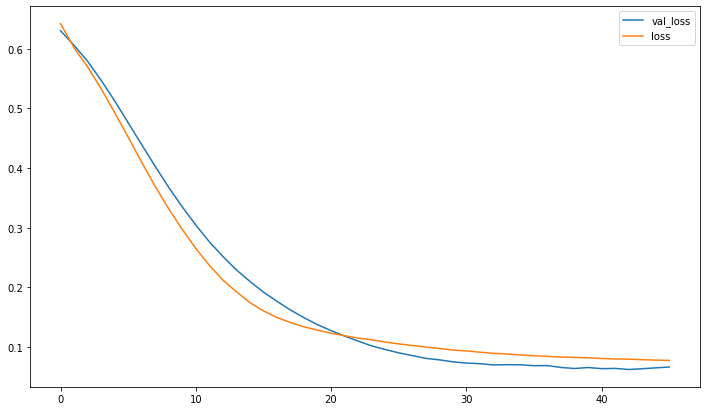

In [ ]:
losses[['val_loss','loss']].plot()

In [ ]:
print(classification_report(y_test,preds2))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
print(f'ACCURACY IS : {accuracy_score(y_test,preds2)}')

ACCURACY IS : 1.0


Text(87.0, 0.5, 'Actual')

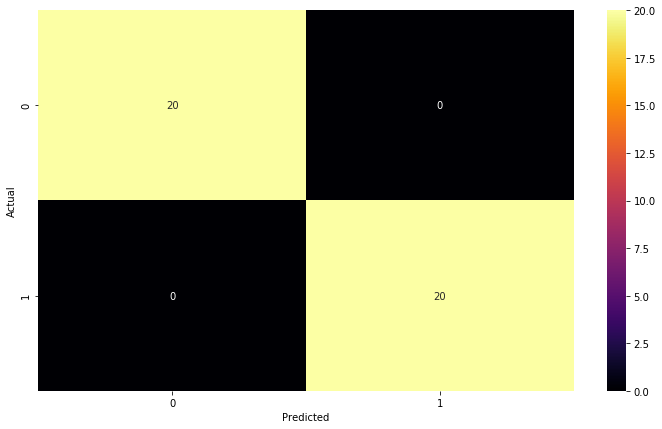

In [ ]:
sns.heatmap(confusion_matrix(y_test,preds2),cmap='inferno',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### We get even better results even with this